# **Perbandingan Algoritma KNN dan Naive Bayes untuk Klasifikasi Kanker Payudara pada Dataset Wisconsin Diagnostic**

## **Pendahuluan**

Kanker payudara merupakan salah satu penyakit paling mematikan di dunia, terutama di kalangan perempuan. Menurut data dari World Health Organization (WHO), kanker payudara adalah jenis kanker yang paling umum terjadi dan menjadi penyebab utama kematian akibat kanker pada perempuan di seluruh dunia. Deteksi dini kanker payudara sangat penting untuk meningkatkan peluang kesembuhan pasien. Oleh karena itu, pengembangan sistem prediksi berbasis data medis sangat diperlukan untuk membantu dokter dalam proses diagnosis.

Seiring berkembangnya teknologi, penerapan Machine Learning dalam dunia medis telah menjadi alternatif yang menjanjikan untuk mendeteksi penyakit secara lebih cepat dan akurat. Salah satu studi yang banyak dilakukan adalah klasifikasi jenis kanker payudara menjadi dua kategori utama, yaitu ganas (malignant) dan jinak (benign). Dataset Wisconsin Breast Cancer Diagnostic merupakan salah satu dataset yang paling sering digunakan untuk keperluan penelitian dan pengembangan sistem klasifikasi kanker payudara.

## **Data Understanding**

### Sumber Data :

Dataset yang saya gunakan dalam project ini adalah **Wisconsin Breast Cancer Diagnostic Dataset (WBCD)**. Dataset ini disediakan oleh Dr. William H. Wolberg, seorang ahli patologi di University of Wisconsin Hospitals, dan tersedia secara publik melalui **UCI Machine Learning Repository**.

untuk link dataset yang diambil: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Tujuan :

Tujuan utama dari dataset ini adalah untuk:

- Memprediksi jenis tumor payudara berdasarkan fitur-fitur hasil ekstraksi digital dari citra biopsi jaringan payudara.

- Klasifikasi dilakukan ke dalam dua kategori:

  - Malignant (M): Tumor ganas

  - Benign (B): Tumor jinak

### Integrasi Data :

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

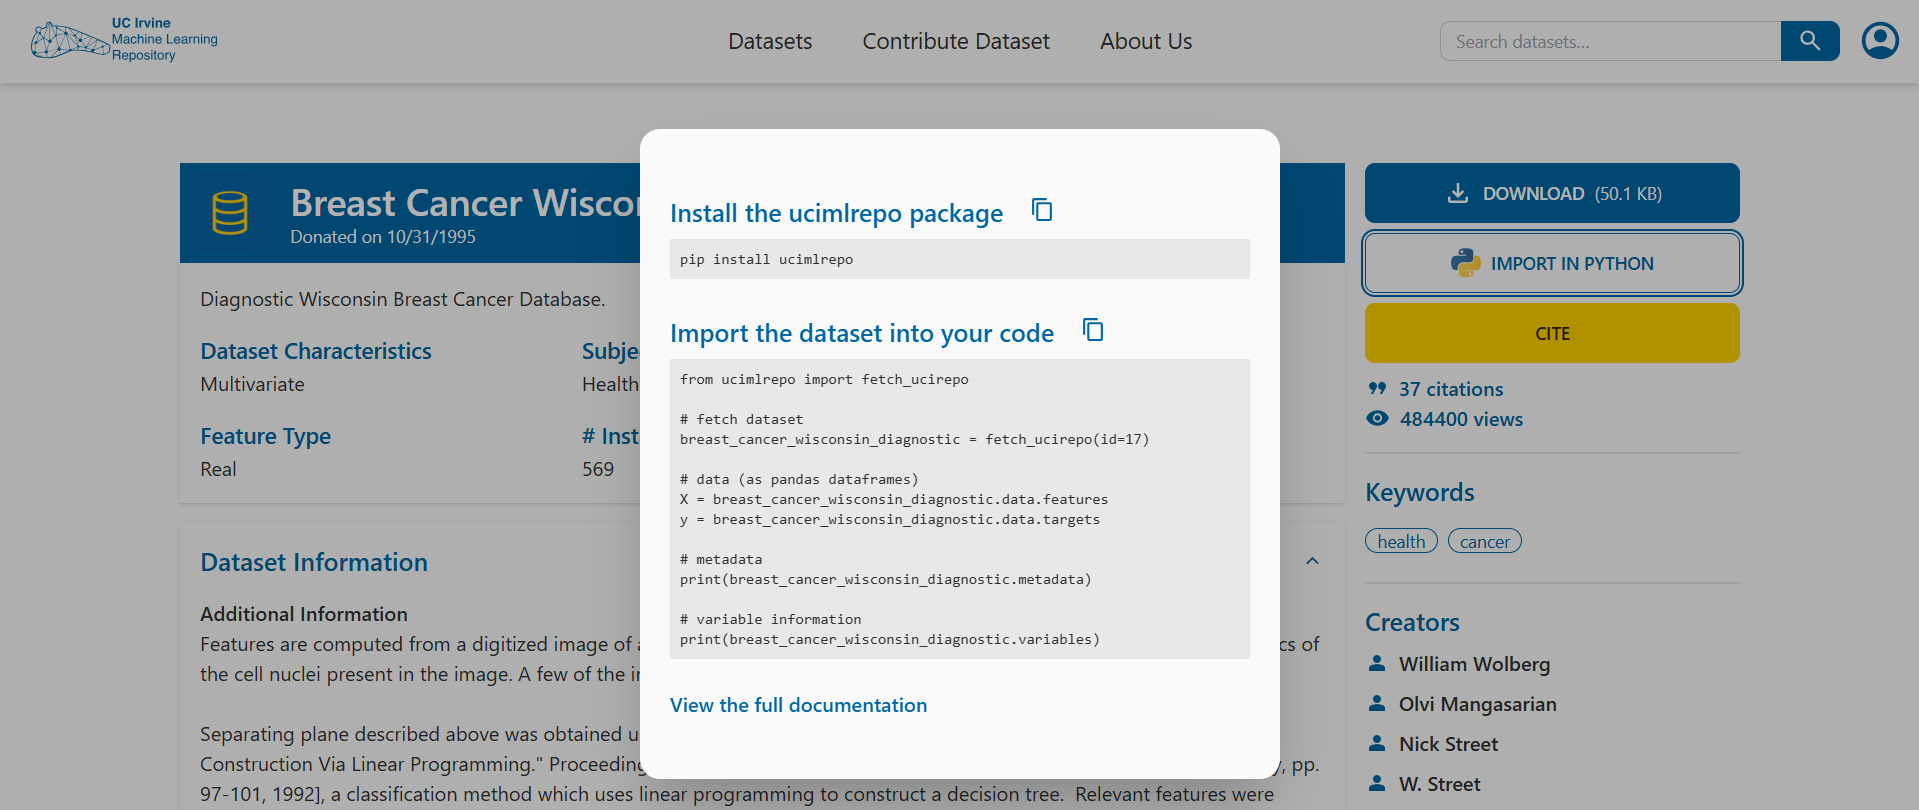

In [26]:
!pip install ucimlrepo

In [27]:
# Import library
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Step 1: Ambil dataset dari UCI
bc = fetch_ucirepo(id=17)

# Step 2: Ekstrak fitur dan target
X = bc.data.features
y = bc.data.targets

# Step 3: Ubah label Diagnosis menjadi numerik (M = 1, B = 0)
y_encoded = LabelEncoder().fit_transform(y)

# Step 4: Pilih 10 fitur paling penting menggunakan ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)

# Ambil nama kolom fitur yang terpilih
selected_columns = X.columns[selector.get_support()]
print("Fitur yang digunakan:", list(selected_columns))

# Gabungkan fitur terpilih dengan label menjadi satu DataFrame
df = pd.DataFrame(X_selected, columns=selected_columns)
df['Diagnosis'] = y_encoded

# Step 5: Cek struktur data akhir
print("\nStruktur data setelah seleksi fitur:")
print(df.info())

# Tampilkan 5 data awal
display(df.head())

Fitur yang digunakan: ['radius1', 'perimeter1', 'area1', 'concavity1', 'concave_points1', 'radius3', 'perimeter3', 'area3', 'concavity3', 'concave_points3']

Struktur data setelah seleksi fitur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius1          569 non-null    float64
 1   perimeter1       569 non-null    float64
 2   area1            569 non-null    float64
 3   concavity1       569 non-null    float64
 4   concave_points1  569 non-null    float64
 5   radius3          569 non-null    float64
 6   perimeter3       569 non-null    float64
 7   area3            569 non-null    float64
 8   concavity3       569 non-null    float64
 9   concave_points3  569 non-null    float64
 10  Diagnosis        569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB
None


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,radius1,perimeter1,area1,concavity1,concave_points1,radius3,perimeter3,area3,concavity3,concave_points3,Diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625,1


### Eksplorasi Data

#### Visualisasi Data

In [28]:
display(df)

,radius1,perimeter1,area1,concavity1,concave_points1,radius3,perimeter3,area3,concavity3,concave_points3,Diagnosis
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216,1
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628,1
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418,1
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650,1


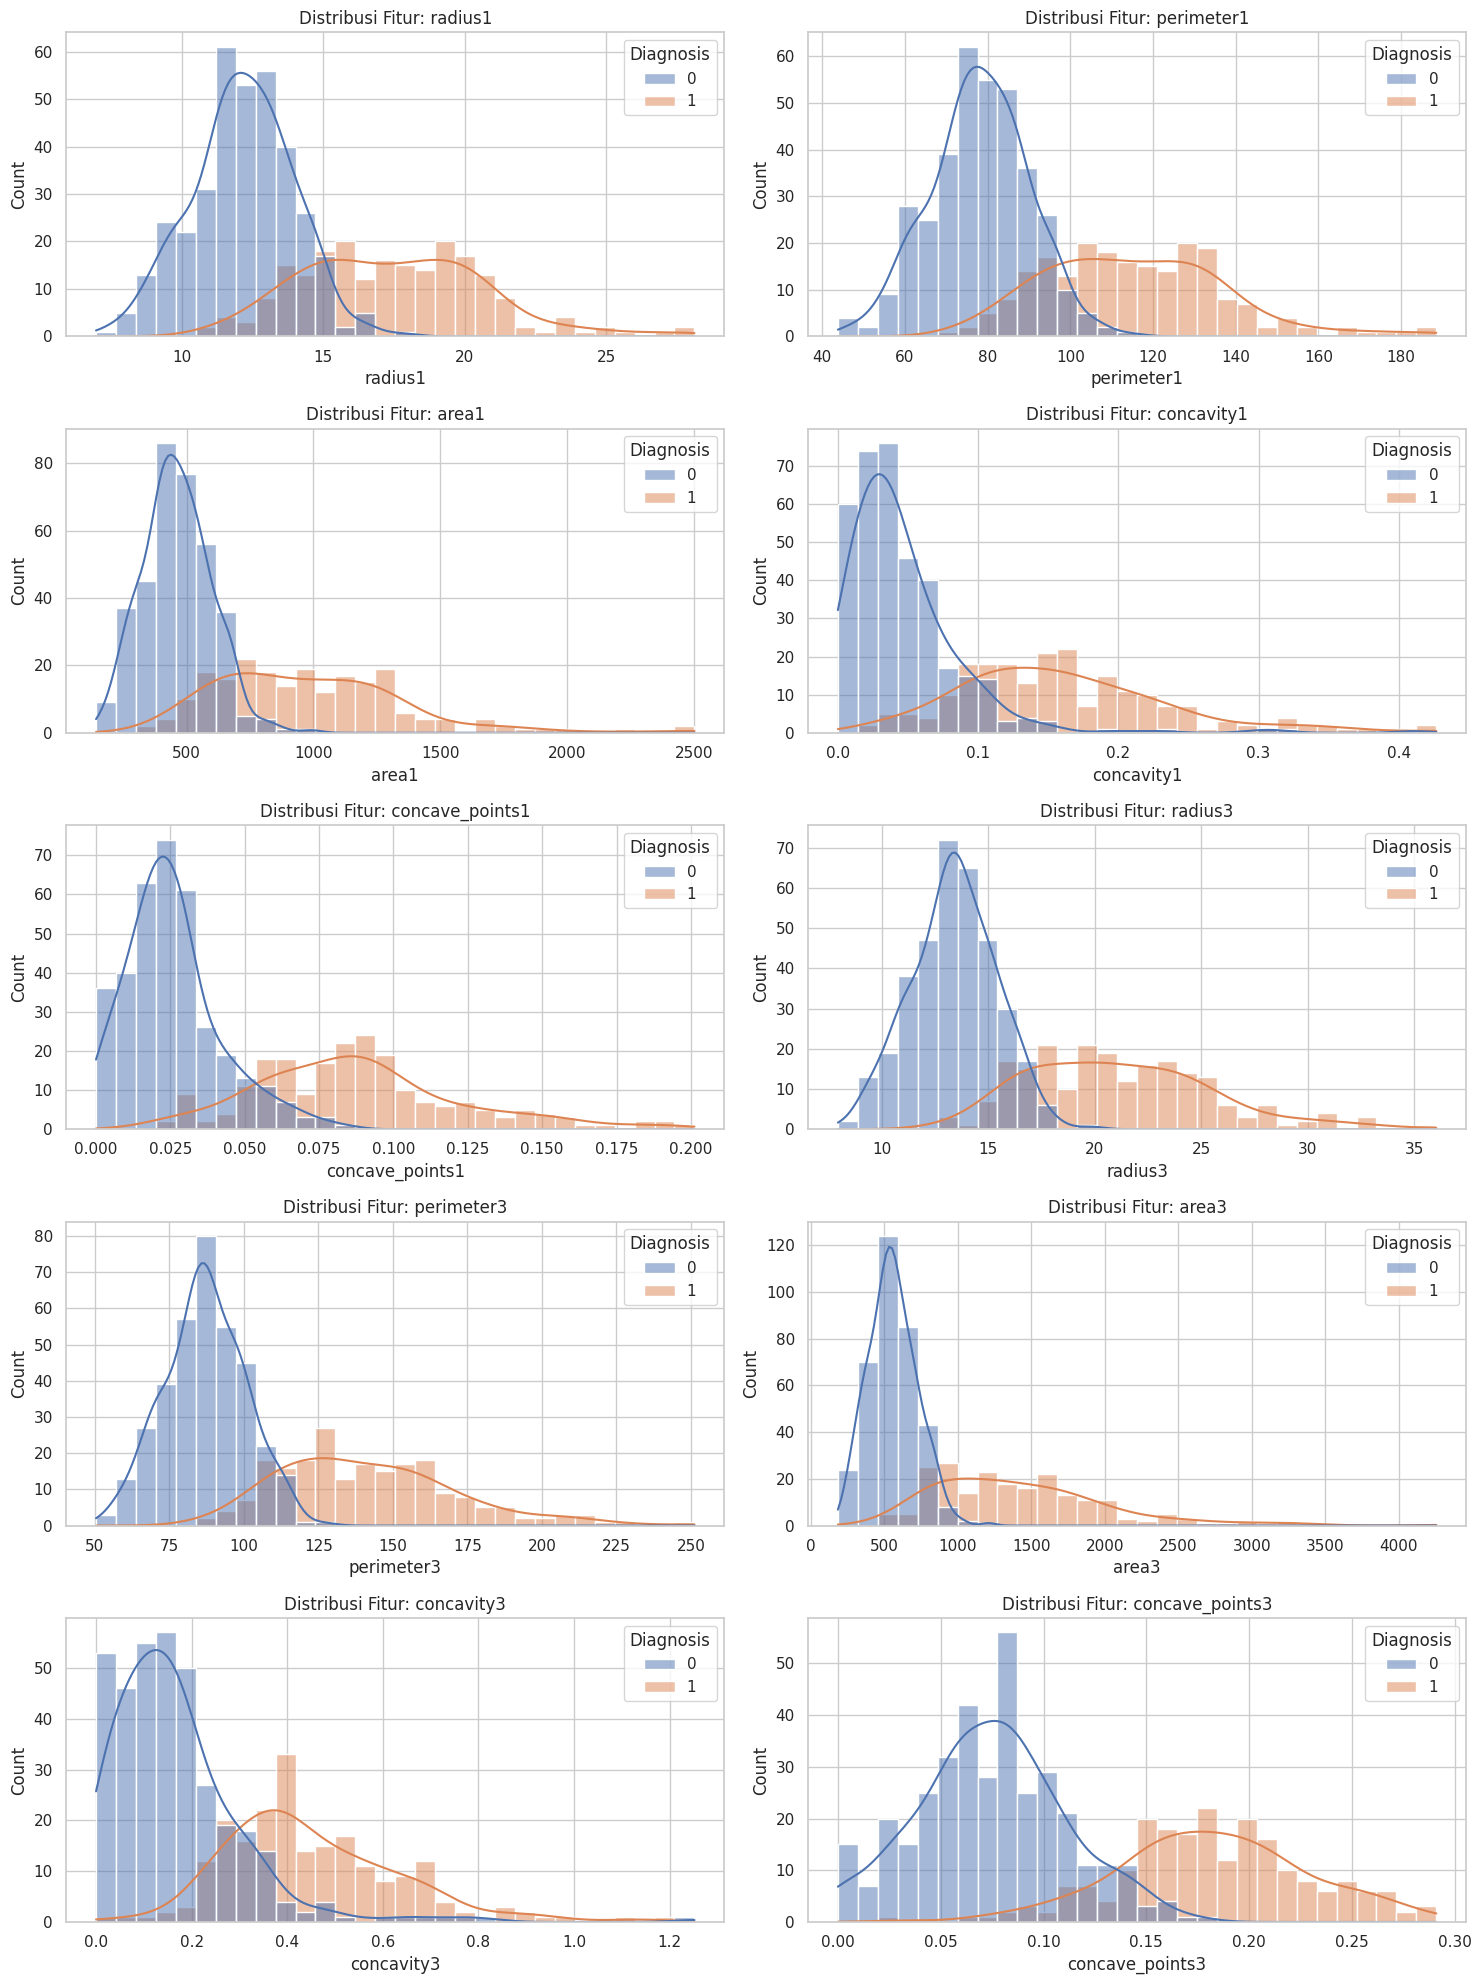

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set(style="whitegrid")

# Ukuran figure global
plt.figure(figsize=(15, 20))

# Looping setiap fitur untuk membuat histogram (distribusi)
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(5, 2, i + 1)
    sns.histplot(data=df, x=column, hue="Diagnosis", kde=True, bins=30)
    plt.title(f"Distribusi Fitur: {column}")

plt.tight_layout()
plt.show()


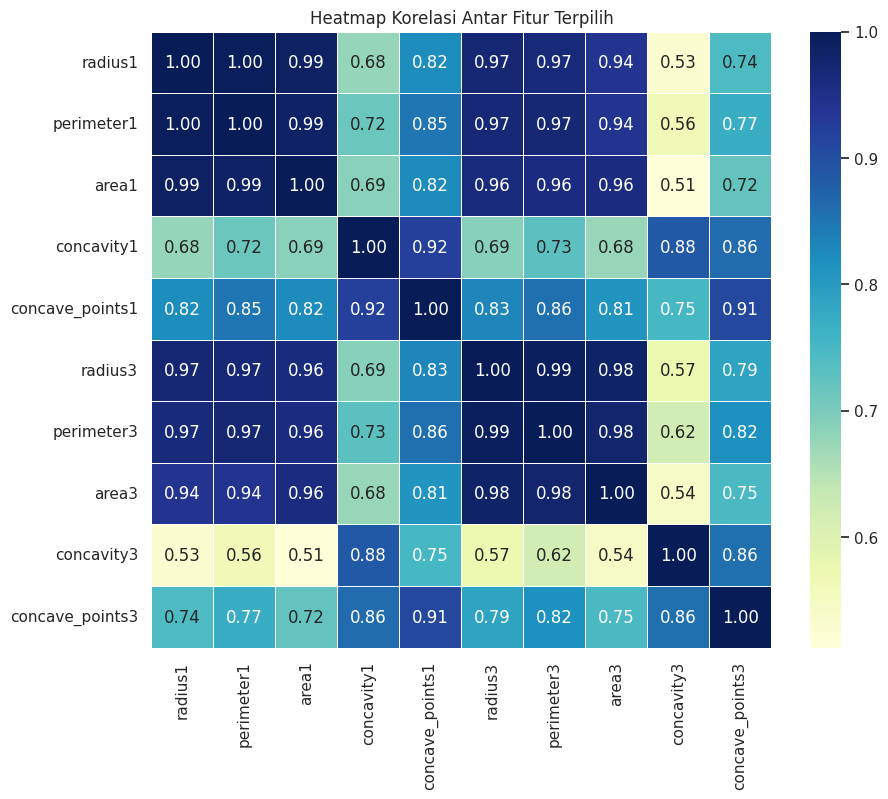

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns='Diagnosis').corr()

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Terpilih")
plt.show()


### Struktur Dataset

#### Fitur dan Label

Terdapat 10 fitur pada dataset ini yang telah dipilih secara otomatis menggunakan teknik seleksi fitur (SelectKBest) berdasarkan tingkat pengaruhnya terhadap label klasifikasi.

Berikut penjelasan dari fitur-fitur tersebut:

- radius_mean: berisi rata-rata panjang radius dari inti sel yang terdeteksi pada citra digital. Radius diukur dari pusat sel ke batasnya.

- perimeter_mean: berisi nilai keliling rata-rata dari inti sel yang diamati.

- area_mean: berisi nilai luas permukaan rata-rata dari inti sel yang terdeteksi.

- concavity_mean: menggambarkan tingkat kecekungan permukaan sel (concavity) berdasarkan citra digital, dalam bentuk rata-rata.

- concave points_mean: berisi rata-rata jumlah titik-titik cekung (concave points) pada batas sel kanker.

- radius_worst: berisi nilai maksimum radius inti sel berdasarkan pengukuran gambar (worst = nilai maksimum).

- perimeter_worst: berisi nilai maksimum dari keliling inti sel yang diamati.

- area_worst: berisi nilai maksimum dari luas permukaan inti sel yang terdeteksi.

- concavity_worst: menggambarkan kecekungan terbesar dari kontur inti sel pada pengamatan citra.

- concave points_worst: berisi jumlah titik cekung maksimum dari batas luar sel.


Terdapat 1 field label dengan 2 tipe pada dataset ini:

- Benign (jinak) dilambangkan dengan angka 0

- Malignant (ganas) dilambangkan dengan angka 1

In [31]:
# Tampilkan jumlah fitur dan label
print(f"Jumlah fitur terpilih: {len(selected_columns)}")
print(f"Jumlah label: 1 ('Diagnosis')")

# Struktur fitur dan tipe data
struktur_fitur = pd.DataFrame({
    'Nama Fitur': selected_columns,
    'Tipe Data': df[selected_columns].dtypes.values
})

print("\nStruktur Fitur:")
print(struktur_fitur)

# Informasi label
label_mapping = pd.Series({0: 'Benign (jinak)', 1: 'Malignant (ganas)'})
print("\nLabel Diagnosis:")
print(label_mapping)

Jumlah fitur terpilih: 10
Jumlah label: 1 ('Diagnosis')

Struktur Fitur:
        Nama Fitur Tipe Data
0          radius1   float64
1       perimeter1   float64
2            area1   float64
3       concavity1   float64
4  concave_points1   float64
5          radius3   float64
6       perimeter3   float64
7            area3   float64
8       concavity3   float64
9  concave_points3   float64

Label Diagnosis:
0       Benign (jinak)
1    Malignant (ganas)
dtype: object


### Identifikasi Kualitas Dataset

#### Deteksi Missing Value

In [32]:
# Cek apakah ada nilai kosong (missing value) di setiap kolom
missing_per_column = df.isnull().sum()

# Cek total missing value di seluruh dataset
total_missing = df.isnull().sum().sum()

# Tampilkan hasil
print("Missing value per kolom:\n", missing_per_column)
print(f"\nTotal missing value di seluruh dataset: {total_missing}")

Missing value per kolom:
 radius1            0
perimeter1         0
area1              0
concavity1         0
concave_points1    0
radius3            0
perimeter3         0
area3              0
concavity3         0
concave_points3    0
Diagnosis          0
dtype: int64

Total missing value di seluruh dataset: 0


## **Preprocessing**